# Plot figures of the bathymetry used for the ROMS run

In [101]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import matplotlib

path_fig = '/Users/iriskeizer/Documents/ROMS/figures/bathymetry'

In [25]:
path = '/Users/iriskeizer/Documents/ROMS/data'
grid = xr.open_dataset(f'{path}/grid/NorthSea4_smooth01_sponge_nudg.nc')
roms = xr.open_dataset(f'{path}/ROMS output/SODA/23nov/nospinup/NorthSea4_avg_run5_annual.nc')

In [26]:
bathymetry = -grid.h
bathymetry_roms = -roms.h

### Simple plot

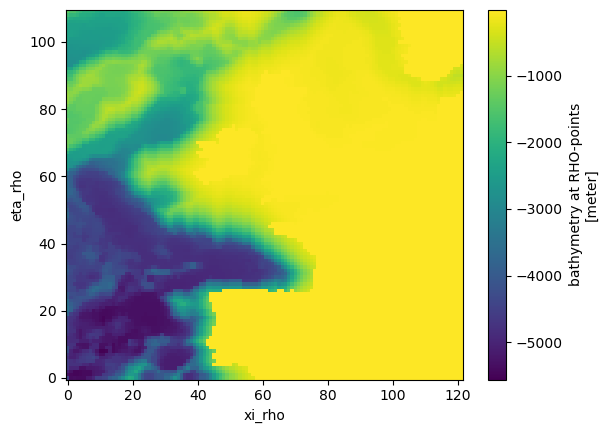

In [27]:
bathymetry.plot()

In [28]:
bathymetry_diff = bathymetry_roms - bathymetry

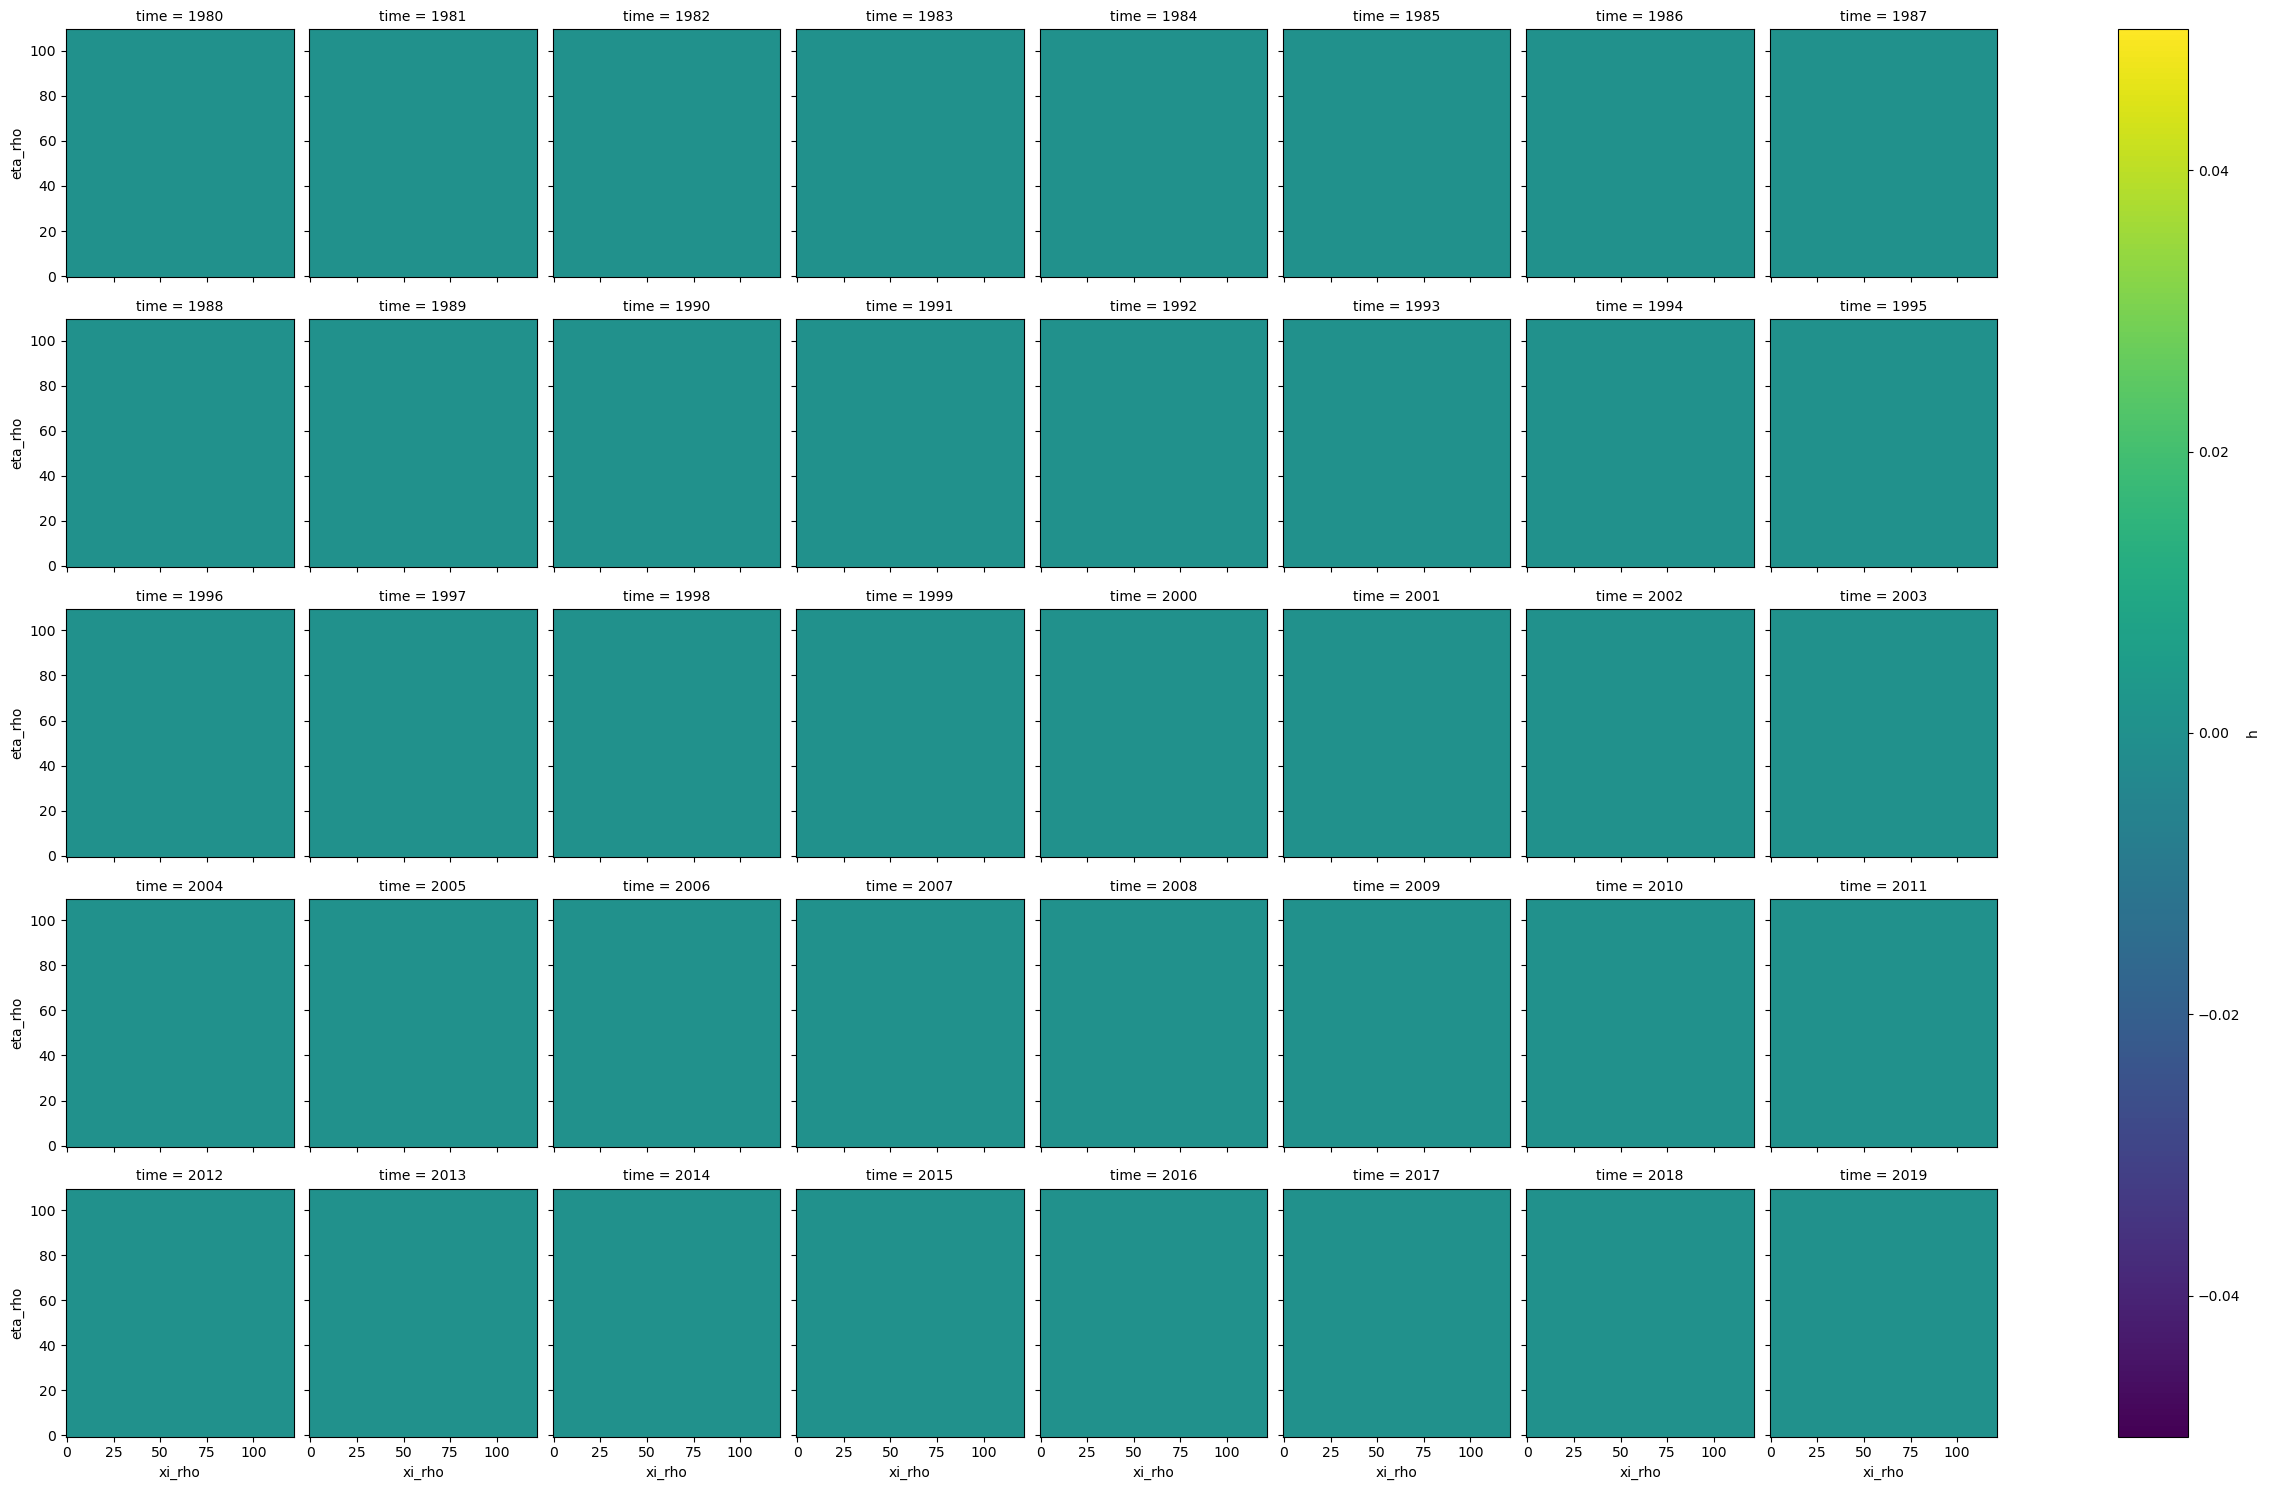

In [29]:
bathymetry_diff.plot(col='time', col_wrap = 8)

So the bathymetry doesn't change over time and is equal to the grid bathymetry

## Mask land values

In [35]:
bathymetry = bathymetry.where(grid.mask_rho == 1, np.nan)

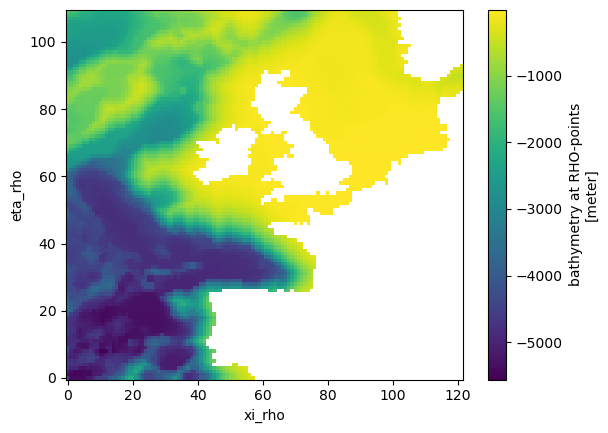

In [36]:
bathymetry.plot()

## Advanced map as created by Trond Kristiansen

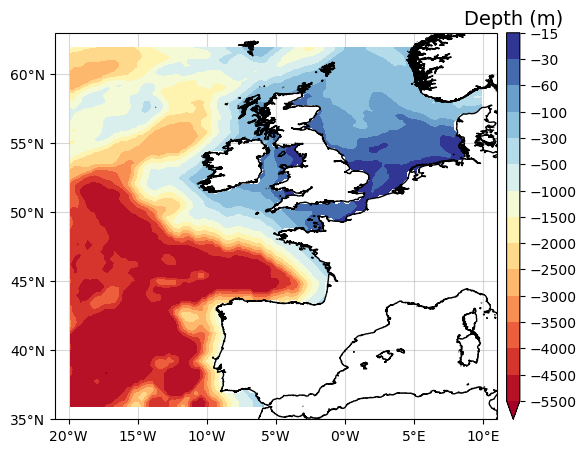

In [77]:
def set_extent_and_map_axes(ax):
    
    
    ldom = np.array([[30.0, 67.0], [-25.0, 15.0]])
    ax.set_extent([-21, 11, 35, 63], crs=ccrs.PlateCarree())
    ax.set_xticks([-20, -15, -10, -5, 0, 5, 10], crs=ccrs.PlateCarree())
    ax.set_yticks([35, 40, 45, 50, 55, 60], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    return ax


def add_colorbar(cs, levels, ax, fig):
    steps = 4
    ticks = [float("{:.1f}".format(levels[i])) for i in range(0, len(levels), steps)]
    ticks = levels
    
    divider = make_axes_locatable(ax)
    ax_cb = divider.new_horizontal(size="3%", pad=0.1, axes_class=plt.Axes)
    fig.add_axes(ax_cb)
    clb = plt.colorbar(cs,
                       fraction=0.01,
                       orientation="vertical",
                       ticks=ticks,
                       cax=ax_cb)
    clb.ax.set_title("Depth (m)", fontsize=14)




def create_map_grid(ds, depths, levels):

    fig = plt.figure(figsize=(6, 6))
    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax = set_extent_and_map_axes(ax)

    cs1 = ax.contourf(ds.lon_rho.values, ds.lat_rho.values, depths.values,
                      cmap=level_colormap(levels, cmap=plt.cm.get_cmap("RdYlBu")),
                      levels=levels,
                      zorder=2,
                      alpha=1.0,
                      extend="min",
                      transform=ccrs.PlateCarree())

   # ax.scatter(ds.lon_rho.values, ds.lat_rho.values, c="r", s=1, zorder=10, transform=ccrs.PlateCarree())
   #  ax.coastlines(zorder=20, linewidth=2)
   #  ax.add_feature(cfeature.LAND, color="lightgrey", zorder=20)
   #  ax.coastlines(resolution="10m", linewidth=2, color="black", alpha=1.0, zorder=4)
    ax.add_feature(cfeature.GSHHSFeature('high', edgecolor='black'), zorder=20)
    plt.grid(True, zorder=0, alpha=0.5)
    add_colorbar(cs1, levels, ax, fig)
    


    
def level_colormap(levels, cmap=None):
    """Make a colormap based on an increasing sequence of levels"""

    # Start with an existing colormap
    if cmap == None:
        cmap = pl.get_cmap()

    # Spread the colours maximally
    nlev = len(levels)
    S = np.arange(nlev, dtype='float') / (nlev - 1)
    A = cmap(S)

    # Normalize the levels to interval [0,1]
    levels = np.array(levels, dtype='float')
    L = (levels - levels[0]) / (levels[-1] - levels[0])

    # Make the colour dictionary
    R = [(L[i], A[i, 0], A[i, 0]) for i in range(nlev)]
    G = [(L[i], A[i, 1], A[i, 1]) for i in range(nlev)]
    B = [(L[i], A[i, 2], A[i, 2]) for i in range(nlev)]
    cdict = dict(red=tuple(R), green=tuple(G), blue=tuple(B))

    # Use
    return matplotlib.colors.LinearSegmentedColormap(
        '%s_levels' % cmap.name, cdict, 256)


levels = [-5500, -4500, -4000, -3500, -3000, -2500, -2000, -1500, -1000, -500, -300, -100, -60, -30, -15]

create_map_grid(grid, bathymetry, levels)

## Change bathymetry plot

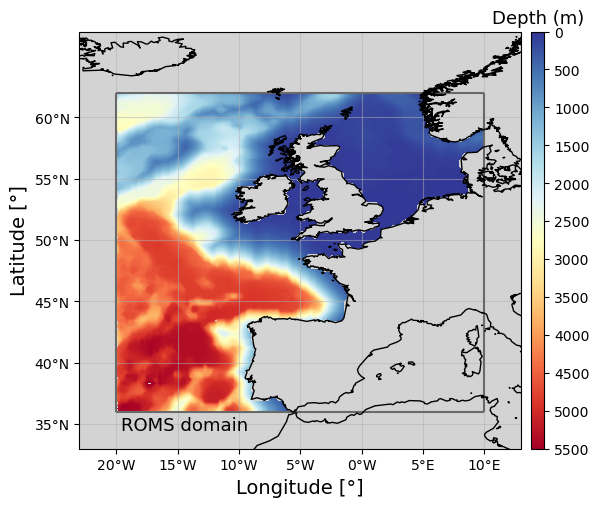

In [123]:
def set_extent_and_map_axes(ax):
    
    
    ldom = np.array([[33.0, 63.0], [-23.0, 13.0]])
    ax.set_extent([-23, 13, 33, 67], crs=ccrs.PlateCarree())
    ax.set_xticks([-20, -15, -10, -5, 0, 5, 10], crs=ccrs.PlateCarree())
    ax.set_yticks([35, 40, 45, 50, 55, 60], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    return ax


def add_colorbar(cs, ax, fig):
    steps = 4

    divider = make_axes_locatable(ax)
    ax_cb = divider.new_horizontal(size="3%", pad=0.1, axes_class=plt.Axes)
    fig.add_axes(ax_cb)
    clb = plt.colorbar(cs,
                       fraction=0.01,
                       orientation="vertical",
                       cax=ax_cb)
    clb.ax.set_title("Depth (m)", fontsize=13)
    clb.ax.invert_yaxis()
    
    clb.set_ticks(range(0, 5501, 500), fontsize = 13)



def create_map_grid(ds, depths):

    fig = plt.figure(figsize=(6, 6))
    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax = set_extent_and_map_axes(ax)

    
    cs1 = ax.contourf(ds.lon_rho.values, ds.lat_rho.values, -depths.values,
                      np.arange(0, 5501, 1),
                      cmap=plt.cm.get_cmap("RdYlBu_r"),
                      transform=ccrs.PlateCarree())

    ax.add_feature(cfeature.GSHHSFeature('low', edgecolor='black'), zorder=20)
    plt.grid(True, zorder=0, alpha=0.5)
    add_colorbar(cs1, ax, fig)
    ax.set_facecolor('lightgray')
    ax.set_xlabel('Longitude [°]', fontsize = 14)
    ax.set_ylabel('Latitude [°]', fontsize = 14)
    
    
    #ax.contour(ds.lon_rho.values, ds.lat_rho.values, -depths.values, [200], colors = 'tab:red', linewidths = 2)
    #ax.contour(ds.lon_rho.values, ds.lat_rho.values, -depths.values, [50], colors = 'tab:red', linewidths = 2)
    
    
    
    ax.text(-19.6, 34.5, 'ROMS domain', color = 'k', fontsize = 13)
    ax.hlines([36, 62], -20, 10, colors = 'dimgray')
    ax.vlines([-20, 10], 36, 62, colors = 'dimgray')
    
    
    
    
    
    plt.savefig(f'{path_fig}/bathymetry', bbox_inches="tight", transparent = True)
    
create_map_grid(grid, bathymetry)